Gradient Descent on Rosenbrock function


In this part, you are required to optimize the Rosenbrock function. This function serves to benchmark all
optimization algorithms alike. The function can be stated mathematically as follows:
$$f(x, y) = (a − x)^2 + b(y - (x)^2)^2 $$


The function is known to be challenging for optimization. The global minimum is however known to
be at: $$(a, a^2) $$

where the function value is:
$$f(x, y) = 0 $$

let a = 1 and b = 100 as given in the question

The function after substituting the values of a and b :
$$f(x, y) = (1 − x)^2 + 100(y - (x)^2)^2 $$ 

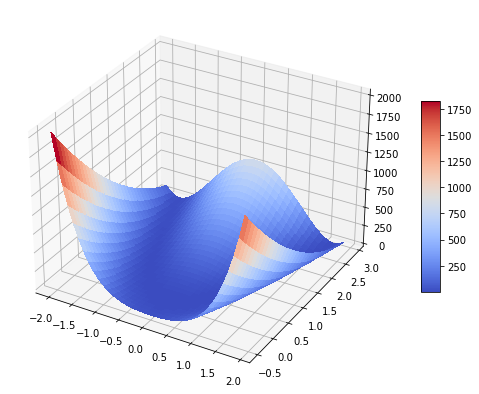

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

#Initializing a and b as given in the question
b = 100;
a= 1

#Representing the given rosenbrock function after substituiting values for a and b
Rosen_func = lambda x,y: (1-x)**2 + 100*((y-(x**2))**2);

#Initializing the values for steplength mu

mu = 0.002


# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

# forming the x and y axes
X = np.arange(-2, 2, 0.1)
Y = np.arange(-0.5, 3, 0.1)
X, Y = np.meshgrid(X, Y)

Z = Rosen_func(X,Y)  #Evaluating the function

# Plot the surface
surf = axRos.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


Calculate the partial derivatives of the function f wrt to x and y :
We have 
$$ df/dx = -2 + 2x -400xy +400x^3 $$
$$ df/dy = 200y - 200x^2 $$



In [2]:
#Function to find the partial derivatives wrt to x and y and return them as an array

def firstDerivative(x,y):
    
    df_x = -2+ (2*x) - (400*x*y) + (400*(x**3))
    df_y = (200*y) - (200*(x**2))
    return df_x,df_y


In [3]:
print(firstDerivative(10,10)) 

(360018, -18000)


Gradient Descent algorithm for optimizing the function - to find the min value

$$ x_i = randomInitialization()$$
$$ for (i=0...imax)$$
$$ x_{i+1} = x_i - mu*\delta f(x_i)$$
$$ if (f(x_i) - f(x_{i+1}) < \epsilon): $$
$$  return (x_{i+1}) $$
$$ raise exception"Not converged" $$


In [4]:
x = np.array((-.2, .3)) #initializing the x and y values
x_list = np.zeros(10000) #initializing arrays for storing the iteration x and y values
y_list=np.zeros(10000)
result_list=np.zeros(10000)
result = 0
count=1
ep = sys.float_info.epsilon


#print(y)
for i in range(0,10000):
    count+=1
    df = firstDerivative(x[0],x[1]) # finding the derivative
    result = Rosen_func(x[0],x[1]) # finding func value
    x_list[i]= x[0]    #appending values to list for plotting trajectory
    y_list[i]=x[1]
    result_list[i]= result
    
    x[0] = x[0] - (mu*df[0])  #finding new x
    x[1] = x[1] - (mu*df[1])  #finding new y
    result1 = Rosen_func(x[0],x[1])
    #print("result1-",result1, df[0], df[1])
    if ((result - result1) < ep) : # repeat till error becomes very less
        count+=1
        print(result - result1)
        x_list[i+1]=x[0]
        y_list[i+1]=x[1]
        result_list[i+1]=result1
        break
print("final",result1, count)
print(len(x_list))
print("last elt of x and y:",x_list[10000-1], y_list[10000-1])

#print(len(y))

final 1.1688931857867143e-08 10001
10000
last elt of x and y: 0.9998918847356872 0.9997833484997688


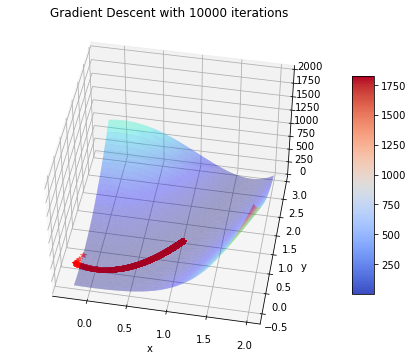

In [5]:
fig = plt.figure(figsize = (16,8))

# Initialize figure 


# forming the x and y axes
X = np.linspace(-.2,2,10000)
y = np.linspace(.3,3,10000)

X, Y = np.meshgrid(X, Y)

Z = Rosen_func(X,Y)  #Evaluating the function

# Plot the surface
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )

#Plotting the trajectory
ax.plot(x_list,y_list, result_list,color = 'r', marker = '*', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('Gradient Descent with {} iterations'.format(count-1))


#ax.set_zlim(0, 150)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


We observe that we are able to reach the minimum values, (1,1) for a=1 case for rosenbrock function through gradient descent after many iterations (imax and steplength through various trial and error). The minima is also visible on the graph.

References

https://people.bath.ac.uk/ps2106/files/courses/MA40050/2020/jupyter/Rosenbrock.html
https://matplotlib.org/
https://numpy.org/